<img src="https://www.projectcubicle.com/wp-content/uploads/2022/04/Ethical-Problem-of-Artificial-Intelligence-4.jpg"><br>
# <center><strong><font color=orange> Utilizando a Biblioteca PyCaret para Prever Preços de Ações </font></strong></center>

## <strong>Introdução</strong><br>
Este estudo tem como objetivo principal empregar técnicas avançadas de aprendizado de máquina (machine learning) para desenvolver um `Modelo Preditivo` capaz de estimar com precisão o preço de fechamento das ações da Petrobras ou de outras empresas extraido do site <a href="https://br.financas.yahoo.com/screener">Yahoo Finanças</a>. A abordagem escolhida para esta análise é a regressão linear, um método estatístico robusto e amplamente utilizado para modelar a relação entre variáveis e fazer previsões.<br>

Para alcançar este objetivo, utilizaremos a biblioteca <a href="https://pycaret.org/">PyCaret</a>, Este estudo tem como objetivo principal empregar técnicas avançadas de aprendizado de máquina (machine learning) para desenvolver um Modelo Preditivo capaz de estimar com precisão o preço de fechamento das ações da Petrobras, uma das maiores empresas petrolíferas do mundo e um dos pilares da economia brasileira. A abordagem escolhida para esta análise é a regressão linear, um método estatístico robusto e amplamente utilizado para modelar a relação entre variáveis e fazer previsões.
Para alcançar este objetivo, utilizaremos a biblioteca `PyCaret`, uma ferramenta de código aberto e baixo código (low-code) projetada para simplificar e automatizar o processo de criação de modelos de machine learning em Python. A `PyCaret` oferece uma série de vantagens significativas para este projeto:<br>

- **`Eficiência`**: Permite a rápida experimentação e comparação de múltiplos modelos de regressão.
- **`Facilidade de uso`**: Sua interface intuitiva reduz a complexidade do desenvolvimento de modelos, tornando-o acessível mesmo para profissionais com experiência limitada em programação.
- **`Automação`**: Oferece funcionalidades automatizadas para pré-processamento de dados, seleção de features, treinamento de modelos e otimização de hiperparâmetros.
- **`Flexibilidade`**: Suporta uma ampla gama de algoritmos de machine learning e permite fácil integração com outras bibliotecas populares do ecossistema Python.

Ao longo deste estudo, exploraremos diversas variáveis que podem influenciar o preço das ações, como indicadores econômicos, preços de uma empresa no mercado internacional, dados fundamentalistas da empresa e análises técnicas do mercado de ações. O **Modelo de Regressão Linear** será treinado com dados históricos e sua performance será avaliada utilizando métricas apropriadas, como o erro médio quadrático (MSE) e o coeficiente de determinação (R²).<br>

Além disso, discutiremos as implicações práticas deste `Modelo Preditivo`, suas limitações e possíveis aplicações no contexto do `Mercado Financeiro` e da tomada de decisões de investimento. Este estudo não apenas demonstrará a aplicação prática de técnicas de **Machine Learning em Finanças**, mas também fornecerá insights valiosos sobre os fatores que influenciam o comportamento das ações de empresas do Brasil e de outros paises.<br>

<strong><hr></strong>

### <strong> Importando as Bibliotecas Necessárias </strong>

No código a seguir, será utilizada a **Biblioteca** `yfinance` para baixar dados financeiros de ações, se precisar. O comando `%pip install --upgrade yfinance` é usado para atualizar a biblioteca **yfinance**. Esta biblioteca facilita a obtenção de dados financeiros históricos e em tempo real, permitindo que os usuários realizem análises financeiras de forma programática no Python.

In [ ]:
# Usar esse comando SE precisar atualizar o módulo
%pip install --upgrade yfinance

No código a seguir, está sendo **importada a biblioteca** `pandas` como `pd` e **importada a biblioteca** `yfinance` como `yf`. A **biblioteca** `pandas` é utilizada para manipulação e análise de dados, enquanto a **biblioteca** `yfinance` é usada para acessar dados financeiros históricos e em tempo real do Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf

### <strong> Obter dados de ações usando a classe `Ticker` e o método `history` </strong>

No código a seguir, está sendo utilizado a **biblioteca** `yfinance` para obter dados de ações. A **função** `yf.Ticker` é usada para criar um objeto `Ticker` associado ao símbolo da ação 'RADL3.SA'. Em seguida, a **função** `history` é chamada com o **parâmetro** `period='2y'` para obter o histórico de preços da ação nos últimos dois anos. Finalmente, a **função** `display` é utilizada para exibir o dataframe resultante.

In [26]:
df = yf.Ticker('RADL3.SA')
ticket = df.history(period='2y')
display(ticket)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-05 00:00:00-03:00,17.366635,17.984865,17.366635,17.909927,5140096,0.000000,0.0
2022-07-06 00:00:00-03:00,17.886368,18.412162,17.717363,18.308882,4715880,0.043182,0.0
2022-07-07 00:00:00-03:00,18.318271,18.844064,18.243157,18.778339,6372600,0.000000,0.0
2022-07-08 00:00:00-03:00,18.778341,19.069406,18.308883,18.740784,7415928,0.000000,0.0
2022-07-11 00:00:00-03:00,18.562387,18.731392,18.308880,18.515442,5166408,0.000000,0.0
...,...,...,...,...,...,...,...
2024-07-01 00:00:00-03:00,25.255643,25.694873,25.215714,25.555119,2775200,0.000000,0.0
2024-07-02 00:00:00-03:00,25.634978,25.634978,25.185766,25.275608,3496200,0.000000,0.0
2024-07-03 00:00:00-03:00,25.455293,25.824645,25.305556,25.595047,5888600,0.000000,0.0


### <strong> Retirar as colunas que não será usado usanao o método `drop` </strong>

In [27]:
ticket = ticket.drop(['Dividends', 'Stock Splits'], axis=1)
display(ticket)

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-05 00:00:00-03:00,17.366635,17.984865,17.366635,17.909927,5140096
2022-07-06 00:00:00-03:00,17.886368,18.412162,17.717363,18.308882,4715880
2022-07-07 00:00:00-03:00,18.318271,18.844064,18.243157,18.778339,6372600
2022-07-08 00:00:00-03:00,18.778341,19.069406,18.308883,18.740784,7415928
2022-07-11 00:00:00-03:00,18.562387,18.731392,18.308880,18.515442,5166408
...,...,...,...,...,...
2024-07-01 00:00:00-03:00,25.255643,25.694873,25.215714,25.555119,2775200
2024-07-02 00:00:00-03:00,25.634978,25.634978,25.185766,25.275608,3496200
2024-07-03 00:00:00-03:00,25.455293,25.824645,25.305556,25.595047,5888600


### <strong> Criar campos de Média Móvel para acrescentar mais `features` ao modelo usando o método `rolling` </strong>

No código a seguir, está sendo utilizado o **ticket** (possivelmente um **DataFrame** do **Pandas**, uma **Biblioteca**), para calcular a **média móvel simples (SMA)** de 7 e 30 dias sobre a coluna **Close**. A **função** **rolling(window=7)** cria uma janela deslizante de 7 períodos, e **mean()** calcula a média dos valores nessa janela. O mesmo processo é repetido para uma janela de 30 períodos com **rolling(window=30)**. Ambas as médias são arredondadas para 2 casas decimais com a **função** **round(2)**. Os resultados são armazenados em novas colunas do **ticket**, chamadas **SMA7**, **SMA15** e **SMA30**. Finalmente, o **DataFrame** atualizado é exibido usando a **função** **display()**.

In [28]:
ticket['SMA7'] = ticket['Close'].rolling(window=7).mean().round(2)
ticket['SMA15'] = ticket['Close'].rolling(window=15).mean().round(2)
ticket['SMA30'] = ticket['Close'].rolling(window=30).mean().round(2)

display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-07-05 00:00:00-03:00,17.366635,17.984865,17.366635,17.909927,5140096,NaN,NaN,NaN
2022-07-06 00:00:00-03:00,17.886368,18.412162,17.717363,18.308882,4715880,NaN,NaN,NaN
2022-07-07 00:00:00-03:00,18.318271,18.844064,18.243157,18.778339,6372600,NaN,NaN,NaN
2022-07-08 00:00:00-03:00,18.778341,19.069406,18.308883,18.740784,7415928,NaN,NaN,NaN
2022-07-11 00:00:00-03:00,18.562387,18.731392,18.308880,18.515442,5166408,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-07-01 00:00:00-03:00,25.255643,25.694873,25.215714,25.555119,2775200,26.04,25.43,25.66
2024-07-02 00:00:00-03:00,25.634978,25.634978,25.185766,25.275608,3496200,25.97,25.45,25.57
2024-07-03 00:00:00-03:00,25.455293,25.824645,25.305556,25.595047,5888600,25.89,25.51,25.51


### <strong> Separar os últimos 30 dias de pregão (cerca de 30 dias) para `Testar a Previsão` </strong>

No código a seguir, está sendo retirado um subconjunto dos últimos 30 dias de dados de pregão de um DataFrame denominado **`ticket`** (classificado como *Classe*). A função **`tail(30)`** (classificada como *Função*) é utilizada para selecionar as últimas 30 linhas do DataFrame, presumivelmente representando aproximadamente 30 dias de pregão. Este subconjunto é então armazenado na variável **`ticket_text`** (classificada como *Parâmetro*). Por fim, o conteúdo de **`ticket_text`** é exibido na tela utilizando a função **`display`** (classificada como *Função*).

In [29]:
ticket_text = ticket.tail(30)
display(ticket_text)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2024-05-24 00:00:00-03:00,26.533400,26.553365,25.854592,26.014311,4917300,27.19,26.75,26.08
2024-05-27 00:00:00-03:00,26.104154,26.203979,25.714838,25.874557,2607500,26.94,26.72,26.07
2024-05-28 00:00:00-03:00,26.034275,26.104152,25.654943,25.784714,5634200,26.69,26.70,26.06
2024-05-29 00:00:00-03:00,25.664924,25.984365,25.455293,25.754766,3060600,26.41,26.67,26.08
2024-05-31 00:00:00-03:00,25.525170,25.595047,24.846362,25.026047,16080800,26.03,26.59,26.09
2024-06-03 00:00:00-03:00,24.936205,25.335503,24.826399,25.135855,3414000,25.74,26.56,26.10
2024-06-04 00:00:00-03:00,24.986118,25.375434,24.856345,25.135855,3157900,25.53,26.47,26.09
2024-06-05 00:00:00-03:00,24.956169,25.375433,24.876310,24.906258,4225200,25.37,26.33,26.07
2024-06-06 00:00:00-03:00,24.766503,25.305557,24.526924,25.085941,4517500,25.26,26.20,26.07


### <strong> Remover os últimos 30 dias do `Dataframe Original` </strong>

No código a seguir, está sendo utilizada a função **`drop`** para remover as últimas 30 linhas do **`DataFrame`** chamado **`ticket`**. Para isso, é usado o método **`tail`**, que seleciona as últimas 30 linhas, e o atributo **`index`** para obter os índices dessas linhas. A função **`drop`** então exclui essas linhas do **`DataFrame`**, com a alteração sendo feita no próprio objeto original devido ao parâmetro **`inplace=True`**. Após essa operação, a função **`display`** é utilizada para exibir o **`DataFrame`** atualizado.

In [30]:
ticket.drop(ticket.tail(30).index, inplace=True)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-07-05 00:00:00-03:00,17.366635,17.984865,17.366635,17.909927,5140096,NaN,NaN,NaN
2022-07-06 00:00:00-03:00,17.886368,18.412162,17.717363,18.308882,4715880,NaN,NaN,NaN
2022-07-07 00:00:00-03:00,18.318271,18.844064,18.243157,18.778339,6372600,NaN,NaN,NaN
2022-07-08 00:00:00-03:00,18.778341,19.069406,18.308883,18.740784,7415928,NaN,NaN,NaN
2022-07-11 00:00:00-03:00,18.562387,18.731392,18.308880,18.515442,5166408,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-17 00:00:00-03:00,27.441803,27.671399,27.411855,27.551611,4230200,26.77,26.31,25.96
2024-05-20 00:00:00-03:00,27.551613,27.990842,27.461770,27.751261,3896300,27.01,26.45,26.02
2024-05-21 00:00:00-03:00,27.661418,27.831120,27.561595,27.641455,5058900,27.30,26.58,26.07


### <strong> Empurar os valores da ação para frente em um dia usando o método `shift(-1)` </strong>

No código a seguir, está sendo utilizada a **função** `shift(-1)` da **classe** `DataFrame` da **biblioteca** `pandas` para empurrar os valores da coluna **parâmetro** `Close` do **DataFrame** `ticket` um dia para frente. Isso significa que cada valor da coluna `Close` será substituído pelo valor do dia seguinte. A **função** `display()` então exibe o `DataFrame` modificado.

In [31]:
ticket['Close'] = ticket['Close'].shift(-1)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-07-05 00:00:00-03:00,17.366635,17.984865,17.366635,18.308882,5140096,NaN,NaN,NaN
2022-07-06 00:00:00-03:00,17.886368,18.412162,17.717363,18.778339,4715880,NaN,NaN,NaN
2022-07-07 00:00:00-03:00,18.318271,18.844064,18.243157,18.740784,6372600,NaN,NaN,NaN
2022-07-08 00:00:00-03:00,18.778341,19.069406,18.308883,18.515442,7415928,NaN,NaN,NaN
2022-07-11 00:00:00-03:00,18.562387,18.731392,18.308880,18.872232,5166408,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-17 00:00:00-03:00,27.441803,27.671399,27.411855,27.751261,4230200,26.77,26.31,25.96
2024-05-20 00:00:00-03:00,27.551613,27.990842,27.461770,27.641455,3896300,27.01,26.45,26.02
2024-05-21 00:00:00-03:00,27.661418,27.831120,27.561595,27.152313,5058900,27.30,26.58,26.07


### <strong> Remover todos os valores nulos usando o método `dropna` </strong>

No código a seguir, está sendo utilizada a **função** `dropna` da **biblioteca** `pandas` para remover todos os valores nulos do **DataFrame** `ticket`. O **parâmetro** `inplace=True` é usado para garantir que a operação seja feita no próprio **DataFrame** `ticket`, sem a necessidade de criar uma cópia. Em seguida, o **DataFrame** resultante é exibido utilizando a **função** `display`.

In [32]:
ticket.dropna(inplace=True)
display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Date,,,,,,,,
2022-08-15 00:00:00-03:00,20.843952,21.116239,20.740671,21.153799,5062408,20.91,20.36,19.57
2022-08-16 00:00:00-03:00,21.031740,21.257079,20.881513,22.008219,3484832,20.95,20.53,19.68
2022-08-17 00:00:00-03:00,20.984797,22.139667,20.900297,21.904934,9069528,21.12,20.73,19.80
2022-08-18 00:00:00-03:00,22.017604,22.092718,21.585702,21.407309,4292080,21.27,20.90,19.90
2022-08-19 00:00:00-03:00,21.829821,22.130275,21.369752,21.294638,6159608,21.32,21.01,19.99
...,...,...,...,...,...,...,...,...
2024-05-16 00:00:00-03:00,27.451786,27.651436,27.102399,27.551611,6201600,26.58,26.13,25.93
2024-05-17 00:00:00-03:00,27.441803,27.671399,27.411855,27.751261,4230200,26.77,26.31,25.96
2024-05-20 00:00:00-03:00,27.551613,27.990842,27.461770,27.641455,3896300,27.01,26.45,26.02


### <strong> Remover o índice usando o método `reset_index` </strong>

In [33]:
ticket.reset_index(drop=True, inplace=True)
ticket_text.reset_index(drop=True, inplace=True)

display(ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
0,20.843952,21.116239,20.740671,21.153799,5062408,20.91,20.36,19.57
1,21.031740,21.257079,20.881513,22.008219,3484832,20.95,20.53,19.68
2,20.984797,22.139667,20.900297,21.904934,9069528,21.12,20.73,19.80
3,22.017604,22.092718,21.585702,21.407309,4292080,21.27,20.90,19.90
4,21.829821,22.130275,21.369752,21.294638,6159608,21.32,21.01,19.99
...,...,...,...,...,...,...,...,...
436,27.451786,27.651436,27.102399,27.551611,6201600,26.58,26.13,25.93
437,27.441803,27.671399,27.411855,27.751261,4230200,26.77,26.31,25.96
438,27.551613,27.990842,27.461770,27.641455,3896300,27.01,26.45,26.02
439,27.661418,27.831120,27.561595,27.152313,5058900,27.30,26.58,26.07


### <strong> Visualizar as correlações entre as variáveis usando o método `corr()` </strong>

No código a seguir, está sendo usada a **função** `corr()` do **dataFrame** `ticket` para visualizar as correlações entre as variáveis. A função `corr()` é uma ferramenta poderosa da **biblioteca** `pandas`, utilizada para calcular a matriz de correlação entre todas as colunas de um **dataFrame**. Essa matriz mostra o coeficiente de correlação de Pearson entre pares de variáveis, permitindo identificar relações lineares entre elas. Esse processo é essencial para a análise exploratória de dados, ajudando a compreender as dependências e associações entre diferentes variáveis dentro do conjunto de dados.

In [35]:
ticket.corr()

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
Open,1.000000,0.994732,0.995428,0.978657,-0.128155,0.985809,0.961281,0.919329
High,0.994732,1.000000,0.995393,0.984656,-0.104464,0.983075,0.956541,0.914241
Low,0.995428,0.995393,1.000000,0.984795,-0.144476,0.984678,0.958966,0.916832
Close,0.978657,0.984656,0.984795,1.000000,-0.132933,0.968732,0.943536,0.904153
Volume,-0.128155,-0.104464,-0.144476,-0.132933,1.000000,-0.126838,-0.131526,-0.111595
SMA7,0.985809,0.983075,0.984678,0.968732,-0.126838,1.000000,0.985432,0.946218
SMA15,0.961281,0.956541,0.958966,0.943536,-0.131526,0.985432,1.000000,0.976985
SMA30,0.919329,0.914241,0.916832,0.904153,-0.111595,0.946218,0.976985,1.000000


## <strong><font color=orange> Utilizando `PyCaret` para criar Modelo de Machine Learning </font></strong>

In [ ]:
# Usar esse comando SE precisar atualizar o módulo
%pip install --upgrade pycaret

### <strong> Importar a biblioteca de Regressão do `Pycaret` e visualizar a coluna alvo usando a função `setup` </strong>

No código a seguir, está sendo utilizada a **biblioteca** `pycaret.regression` para realizar tarefas de regressão. Primeiramente, a biblioteca é importada com `from pycaret.regression import *`, o que permite acesso a todas as funcionalidades disponíveis na mesma. Em seguida, a **função** `setup` é chamada para configurar o ambiente de modelagem, recebendo como **parâmetros** o **dataframe** `ticket`, o nome da [coluna alvo] `target='Close'`, um **session_id** (usado para garantir a reprodutibilidade dos resultados com a mesmas informações) definido como `123`, e a opção `remove_multicollinearity` definida como `False` para não remover colunas com alta correlação.

In [34]:
# importar a biblioteca de regressão lib pycaret
from pycaret.regression import *

# Analisando a coluna alvo da base de dados
setup(data = ticket, target = 'Close', session_id = 123, remove_multicollinearity=False) 

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(441, 8)"
4,Transformed data shape,"(441, 8)"
5,Transformed train set shape,"(308, 8)"
6,Transformed test set shape,"(133, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


### <strong> Comparar os modelos e informar os três melhores escolhidos usando a função `compare_models` </strong>

No código a seguir, está sendo utilizada a **função** `compare_models` da **biblioteca** PyCaret para comparar diferentes modelos de machine learning e selecionar os três melhores, especificados pelo **parâmetro** `n_select=3`. Em seguida, os três melhores modelos são exibidos usando a **função** `display`. Este processo automatiza a comparação de modelos, permitindo ao usuário identificar rapidamente os melhores candidatos para o problema em questão.

In [36]:
top3_models = compare_models(n_select=3)
display(top3_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.3425,0.1823,0.4249,0.9714,0.0164,0.0137,3.3590
ridge,Ridge Regression,0.3419,0.1820,0.4242,0.9714,0.0164,0.0137,0.0140
br,Bayesian Ridge,0.3422,0.1823,0.4245,0.9713,0.0164,0.0137,0.0210
et,Extra Trees Regressor,0.3478,0.1983,0.4392,0.9687,0.0169,0.0139,0.1340
catboost,CatBoost Regressor,0.3449,0.2037,0.4449,0.9679,0.0172,0.0138,3.3970
gbr,Gradient Boosting Regressor,0.3506,0.2072,0.4487,0.9672,0.0173,0.0140,0.2020
lightgbm,Light Gradient Boosting Machine,0.3680,0.2114,0.4576,0.9668,0.0176,0.0147,0.1080
rf,Random Forest Regressor,0.3582,0.2120,0.4550,0.9665,0.0175,0.0143,0.1360
ada,AdaBoost Regressor,0.3665,0.2226,0.4648,0.9647,0.0179,0.0146,0.1900
xgboost,Extreme Gradient Boosting,0.3702,0.2275,0.4731,0.9645,0.0181,0.0147,0.1150


[LinearRegression(n_jobs=-1), Ridge(random_state=123), BayesianRidge()]

#### <strong><font color=red>Observações e Definições de Cada Métrica</font></strong>

A tabela acima organiza o *ranking* de modelos se baseando no coeficiente de determinação R², que é uma métrica muito utilizada para observar o quão bem o modelo se ajusta ao conjunto de dados utilizado. Com isso, podemos ver que `MAE`, `MSE`, `RMSE`, `R2`, `RMSLE` e `MAPE` são todas métricas utilizadas para avaliar a acurácia do nosso modelo:<br>

- **MAE (Mean Absolute Error)**: `MAE` é a média dos valores absolutos das diferenças entre os valores previstos e reais. *Menor valor indica melhor performance.* 🔻
- **MSE (Mean Squared Error)**: `MSE` é a média dos quadrados das diferenças entre os valores previstos e reais. *Menor valor indica melhor performance.* 🔻
- **RMSE (Root Mean Squared Error)**: `RMSE` é a raiz quadrada do MSE. *Menor valor indica melhor performance.* 🔻
- **R² (Coefficient of Determination)**: `R²` varia de 0 a 1, sendo 1 o ideal, indicando que a variância dos dados é completamente explicada pelo modelo. *Quanto maior, melhor performance.* 🔺
- **RMSLE (Root Mean Squared Logarithmic Error)**: `RMSLE` é usado principalmente em previsões de séries temporais ou quando os valores são exponencialmente distribuídos. *Menor valor indica melhor performance.* 🔻
- **MAPE (Mean Absolute Percentage Error)**: `MAPE` mede a média dos erros percentuais absolutos. *Menor valor indica melhor performance.* 🔻<br><hr>

### <strong> Testar os 3 melhores modelos 10 vezes e analisar as médias das métricas de `acurácia` </strong>

No código a seguir, está sendo utilizado a **função** `create_model` com diferentes parâmetros para criar os 3 melhores modelos com o parâmetro `fold=10`. Em seguida, cada modelo criado é exibido utilizando a **função** `display`. O parâmetro `fold=10` sugere que a validação cruzada está sendo utilizada com 10 dobras para avaliar o desempenho dos modelos.

In [39]:
model_lr = create_model('lr', fold=10)
display(model_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2927,0.1263,0.3554,0.9822,0.0132,0.0113
1,0.3763,0.1892,0.4350,0.9672,0.0164,0.0148
2,0.3057,0.1666,0.4082,0.9704,0.0161,0.0124
3,0.3420,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3305,0.1626,0.4033,0.9780,0.0159,0.0135
5,0.3240,0.1431,0.3784,0.9765,0.0142,0.0127
6,0.3776,0.2466,0.4966,0.9603,0.0195,0.0154
7,0.3922,0.2113,0.4597,0.9631,0.0183,0.0160
8,0.3706,0.2286,0.4781,0.9657,0.0182,0.0147


LinearRegression(n_jobs=-1)

In [40]:
model_ridge = create_model('ridge', fold=10)
display(model_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2917,0.1227,0.3503,0.9827,0.0130,0.0113
1,0.3828,0.1949,0.4415,0.9662,0.0167,0.0151
2,0.3044,0.1667,0.4083,0.9704,0.0161,0.0124
3,0.3405,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3243,0.1567,0.3958,0.9788,0.0156,0.0132
5,0.3183,0.1382,0.3717,0.9773,0.0140,0.0125
6,0.3811,0.2513,0.5013,0.9596,0.0198,0.0155
7,0.3940,0.2136,0.4621,0.9627,0.0184,0.0161
8,0.3686,0.2283,0.4778,0.9657,0.0182,0.0146


Ridge(random_state=123)

In [46]:
model_br = create_model('br', fold=10)
display(model_br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2919,0.1222,0.3496,0.9827,0.0130,0.0113
1,0.3854,0.1973,0.4442,0.9658,0.0168,0.0152
2,0.3043,0.1668,0.4084,0.9704,0.0161,0.0124
3,0.3402,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3238,0.1563,0.3953,0.9788,0.0156,0.0132
5,0.3176,0.1376,0.3710,0.9774,0.0140,0.0125
6,0.3822,0.2530,0.5030,0.9593,0.0199,0.0155
7,0.3945,0.2143,0.4629,0.9625,0.0185,0.0161
8,0.3683,0.2283,0.4778,0.9657,0.0182,0.0146


BayesianRidge()

### <strong> Melhorar ainda mais a performance do modelo usando a função `tune_model` </strong>

No código a seguir, está sendo definida uma **biblioteca** `ridge_params` com um parâmetro **parâmetro** `alpha` que possui uma lista de valores específicos. Em seguida, a função **função** `model_tune_model` é utilizada para ajustar o modelo **modelo** `model_ridge`. O ajuste é realizado com 1000 iterações, otimizando o parâmetro `RMSE` e utilizando a grade personalizada definida em `ridge_params`. Em seguida, cada modelo criado é exibido utilizando a **função** `display`.

In [44]:
model_tune_lr = tune_model(model_lr, n_iter=1000, optimize = 'RMSE')
display(model_tune_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2927,0.1263,0.3554,0.9822,0.0132,0.0113
1,0.3763,0.1892,0.4350,0.9672,0.0164,0.0148
2,0.3057,0.1666,0.4082,0.9704,0.0161,0.0124
3,0.3420,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3305,0.1626,0.4033,0.9780,0.0159,0.0135
5,0.3240,0.1431,0.3784,0.9765,0.0142,0.0127
6,0.3776,0.2466,0.4966,0.9603,0.0195,0.0154
7,0.3922,0.2113,0.4597,0.9631,0.0183,0.0160
8,0.3706,0.2286,0.4781,0.9657,0.0182,0.0147


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LinearRegression(n_jobs=-1)

In [42]:
ridge_params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
model_tune_ridge = tune_model(model_ridge, n_iter=1000, optimize = 'RMSE', custom_grid = ridge_params)
display(model_tune_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2926,0.1262,0.3552,0.9822,0.0132,0.0113
1,0.3765,0.1894,0.4352,0.9672,0.0164,0.0148
2,0.3057,0.1666,0.4082,0.9704,0.0161,0.0124
3,0.3420,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3303,0.1624,0.4030,0.9780,0.0159,0.0135
5,0.3238,0.1430,0.3781,0.9765,0.0142,0.0127
6,0.3777,0.2467,0.4967,0.9603,0.0196,0.0154
7,0.3922,0.2114,0.4598,0.9630,0.0183,0.0160
8,0.3705,0.2286,0.4781,0.9657,0.0182,0.0147


Fitting 10 folds for each of 5 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ridge(random_state=123)

In [48]:
model_tune_br = tune_model(model_br, n_iter=1000, optimize = 'RMSE')
display(model_tune_br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2916,0.1230,0.3507,0.9826,0.0130,0.0113
1,0.3830,0.1951,0.4417,0.9662,0.0167,0.0151
2,0.3045,0.1667,0.4083,0.9704,0.0161,0.0124
3,0.3406,0.1933,0.4397,0.9715,0.0166,0.0135
4,0.3252,0.1575,0.3968,0.9787,0.0156,0.0132
5,0.3189,0.1387,0.3724,0.9772,0.0140,0.0126
6,0.3810,0.2512,0.5012,0.9596,0.0198,0.0155
7,0.3939,0.2134,0.4620,0.9627,0.0184,0.0161
8,0.3688,0.2283,0.4778,0.9657,0.0182,0.0146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


BayesianRidge(alpha_1=0.3, alpha_2=0.001, lambda_1=0.3, lambda_2=0.2)

## <strong><font color=orange> Análises gráficas </font></strong>

### <strong> Visualizar os erros do modelo escolhido usando a função `plot_model` </strong>

No código a seguir, está sendo utilizada a **função** `plot_model` para visualizar os erros de dois modelos diferentes. Esta **função** faz parte da biblioteca `pycaret`, especializada em machine learning. O primeiro **parâmetro**, `model_ridge`, representa um modelo de regressão Ridge previamente treinado. O segundo **parâmetro**, `model_tune_ridge`, refere-se a uma versão ajustada do mesmo modelo após um processo de afinação de hiperparâmetros. O **parâmetro** `plot='error'` indica que o tipo de gráfico a ser gerado é o de erros, o que ajuda na análise da performance dos modelos comparando seus erros preditivos.

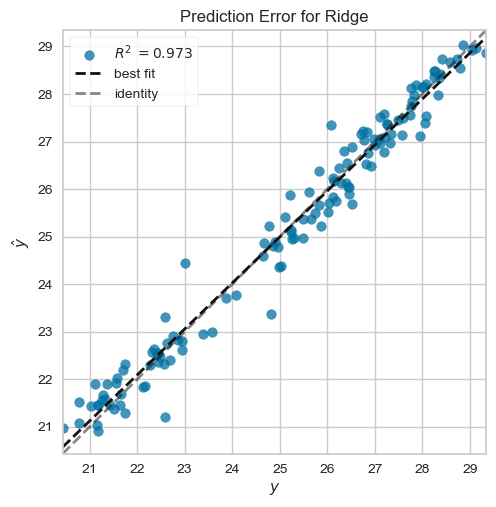

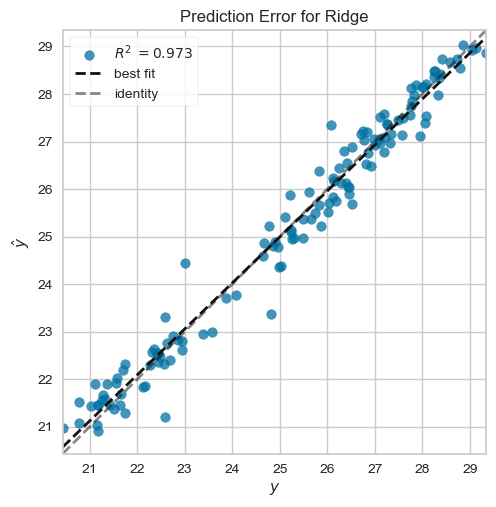

In [51]:
plot_model(model_ridge, plot='error')
plot_model(model_tune_ridge, plot='error')

### <strong> Visualizar a melhor `Feature` utilizada no modelo usando a função `plot_model` </strong>

No código a seguir, está sendo utilizada a **função** `plot_model` da **biblioteca** `pycaret`, que é uma ferramenta de machine learning automatizada. O **parâmetro** `model_tune_ridge` representa o modelo de regressão Ridge previamente ajustado e treinado. O **parâmetro** `plot` é configurado com o valor `'feature'`, indicando que o tipo de gráfico a ser gerado é um gráfico de importância de características. Este gráfico visualiza a importância de cada variável de entrada no modelo de regressão Ridge ajustado, ajudando a entender quais características têm mais impacto na predição.

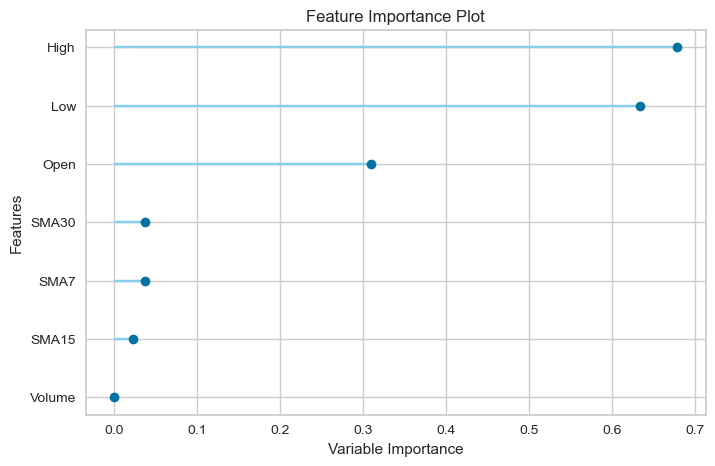

In [54]:
plot_model(model_tune_ridge, plot='feature')

### <strong> Testar os modelos criados com os dados de treinamento usando a função `predict_model` </strong>

No código a seguir, está sendo utilizada a **função** `predict_model` para fazer previsões com três modelos diferentes: `model_tune_lr`, `model_tune_ridge` e `model_tune_br`. A **função** `predict_model`, que pertence a uma **biblioteca** de aprendizado de máquina, recebe como **parâmetro** um modelo previamente ajustado e gera previsões baseadas nos dados fornecidos. O primeiro modelo, `model_tune_lr`, é provavelmente um modelo de regressão linear ajustado; o segundo, `model_tune_ridge`, é um modelo de regressão ridge, que adiciona uma penalização L2 para evitar overfitting; e o terceiro, `model_tune_br`, é um modelo de regressão bayesiana, que incorpora incertezas dos parâmetros na previsão. Esses modelos são utilizados para comparar diferentes técnicas de regressão e avaliar a melhor abordagem para o conjunto de dados em questão.

In [78]:
predict_model(model_tune_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.3166,0.1714,0.4140,0.9728,0.0164,0.0128


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.477781,21.069302,20.440226,7915128,20.879999,21.150000,20.620001,21.172581,20.914297
125,22.402498,22.440321,22.099888,3965520,22.400000,22.969999,22.750000,21.749994,22.318744
287,27.347330,27.892492,26.990496,5474300,27.260000,27.040001,27.080000,27.496012,27.465242
204,28.432692,28.778229,28.314222,6884500,27.920000,27.950001,26.980000,28.235243,28.505320
172,24.662172,24.927971,24.529274,3408288,24.420000,24.040001,23.430000,24.956448,24.791993
...,...,...,...,...,...,...,...,...,...
318,28.100645,28.507038,27.882580,2806700,27.780001,26.639999,26.530001,28.070910,28.221061
151,22.355211,22.638906,22.043148,5394896,22.590000,22.520000,22.240000,22.695650,22.398206
157,23.622387,23.735865,22.998257,8104616,22.910000,22.809999,22.389999,22.582170,23.290744
260,26.810108,27.512512,26.622141,5664400,26.889999,26.879999,27.510000,27.334436,27.180863


In [82]:
predict_model(model_tune_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.3176,0.1733,0.4163,0.9725,0.0165,0.0129


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.477781,21.069302,20.440226,7915128,20.879999,21.150000,20.620001,21.172581,20.899930
125,22.402498,22.440321,22.099888,3965520,22.400000,22.969999,22.750000,21.749994,22.326223
287,27.347330,27.892492,26.990496,5474300,27.260000,27.040001,27.080000,27.496012,27.459626
204,28.432692,28.778229,28.314222,6884500,27.920000,27.950001,26.980000,28.235243,28.493428
172,24.662172,24.927971,24.529274,3408288,24.420000,24.040001,23.430000,24.956448,24.788792
...,...,...,...,...,...,...,...,...,...
318,28.100645,28.507038,27.882580,2806700,27.780001,26.639999,26.530001,28.070910,28.218340
151,22.355211,22.638906,22.043148,5394896,22.590000,22.520000,22.240000,22.695650,22.402713
157,23.622387,23.735865,22.998257,8104616,22.910000,22.809999,22.389999,22.582170,23.306978
260,26.810108,27.512512,26.622141,5664400,26.889999,26.879999,27.510000,27.334436,27.165228


In [80]:
predict_model(model_tune_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.3176,0.1732,0.4161,0.9726,0.0165,0.0129


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
13,20.477781,21.069302,20.440226,7915128,20.879999,21.150000,20.620001,21.172581,20.900916
125,22.402498,22.440321,22.099888,3965520,22.400000,22.969999,22.750000,21.749994,22.325678
287,27.347330,27.892492,26.990496,5474300,27.260000,27.040001,27.080000,27.496012,27.460034
204,28.432692,28.778229,28.314222,6884500,27.920000,27.950001,26.980000,28.235243,28.494254
172,24.662172,24.927971,24.529274,3408288,24.420000,24.040001,23.430000,24.956448,24.789016
...,...,...,...,...,...,...,...,...,...
318,28.100645,28.507038,27.882580,2806700,27.780001,26.639999,26.530001,28.070910,28.218560
151,22.355211,22.638906,22.043148,5394896,22.590000,22.520000,22.240000,22.695650,22.402387
157,23.622387,23.735865,22.998257,8104616,22.910000,22.809999,22.389999,22.582170,23.305847
260,26.810108,27.512512,26.622141,5664400,26.889999,26.879999,27.510000,27.334436,27.166345


#### <strong><font color=red>Observações e Análises dos Modelos</font></strong>

Qual modelo a seguir devo escolher para prever o fechamento de uma ação e qual a justificativa da escolha? Deve-se escolher o modelo **Linear Regression** para prever o fechamento de uma ação. A justificativa para esta escolha é baseada no desempenho dos modelos nas métricas apresentadas:

- **MAE (Mean Absolute Error)**: O Linear Regression tem o menor MAE entre os três modelos, indicando que, em média, suas previsões estão mais próximas dos valores reais.
  
- **MSE (Mean Squared Error)** e **RMSE (Root Mean Squared Error)**: Embora o Linear Regression não tenha o menor MSE e RMSE, a diferença em relação aos outros modelos é muito pequena. Essas métricas penalizam erros maiores, então uma diferença pequena já sugere um bom desempenho.

- **R2 (Coefficient of Determination)**: O Linear Regression tem o maior R2, o que significa que ele explica uma maior proporção da variação nos dados de fechamento da ação em comparação com os outros modelos.

- **RMSLE (Root Mean Squared Logarithmic Error)** e **MAPE (Mean Absolute Percentage Error)**: O Linear Regression tem o menor RMSLE e MAPE, indicando que ele é mais preciso ao prever variações percentuais nos dados de fechamento da ação.

Portanto, considerando todas essas métricas, o Linear Regression apresenta um equilíbrio entre precisão nas previsões e capacidade de explicar a variabilidade dos dados, tornando-o a escolha mais adequada para esta tarefa.<br><hr>

### <strong> Finalizar o modelo com a função `finalize_model` e fazer a previsão com a função `predict_model` </strong>

No código a seguir, está sendo utilizado um modelo de aprendizado de máquina. A função **`finalize_model`** (Função) é usada para finalizar o ajuste de um modelo pré-treinado, **`model_tune_lr`** (Parâmetro). Em seguida, o modelo finalizado, **`final_lr_model`** (Parâmetro), é usado para fazer previsões com a função **`predict_model`** (Função), onde o parâmetro **`data`** é definido como **`ticket_text`** (Parâmetro). O resultado das previsões é armazenado na variável **`predict`** (Parâmetro). Finalmente, o resultado das previsões é exibido usando a função **`display`** (Função).

In [84]:
final_lr_model = finalize_model(model_tune_lr)
predict = predict_model(final_lr_model, data = ticket_text)
display(predict)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0962,0.0170,0.1305,0.9386,0.0050,0.0038


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
0,26.533400,26.553366,25.854591,4917300,27.190001,26.750000,26.080000,26.014311,25.997585
1,26.104155,26.203979,25.714838,2607500,26.940001,26.719999,26.070000,25.874557,25.868400
2,26.034275,26.104153,25.654942,5634200,26.690001,26.700001,26.059999,25.784714,25.766557
3,25.664925,25.984365,25.455294,3060600,26.410000,26.670000,26.080000,25.754766,25.741328
4,25.525169,25.595047,24.846361,16080800,26.030001,26.590000,26.090000,25.026047,24.972951
5,24.936205,25.335503,24.826399,3414000,25.740000,26.559999,26.100000,25.135855,25.171109
6,24.986118,25.375433,24.856344,3157900,25.530001,26.469999,26.090000,25.135855,25.214053
7,24.956169,25.375433,24.876310,4225200,25.370001,26.330000,26.070000,24.906258,25.242522
8,24.766502,25.305557,24.526924,4517500,25.260000,26.200001,26.070000,25.085941,25.029556
9,24.716591,25.684889,24.716591,6116900,25.190001,26.049999,26.090000,25.275608,25.463001


### <strong> Salvar o modelo para utilizar com os dados novos usando a função `save_model` </strong>

No código a seguir, está sendo utilizada a **função** `save_model` para salvar um modelo de aprendizado de máquina. O primeiro **parâmetro**, `final_lr_model`, representa o modelo final de regressão linear que foi treinado e ajustado, utilizando a **biblioteca** `PyCaret`, que é uma ferramenta de automação de machine learning. O segundo **parâmetro**, `'Modelo Final LR PyCaret'`, é uma string que especifica o nome do arquivo em que o modelo será salvo. Assim, o modelo treinado pode ser armazenado para uso posterior, evitando a necessidade de re-treinamento.

In [85]:
save_model(final_lr_model, 'Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'SMA7', 'SMA15', 'SMA30'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 'Modelo Final LR PyCaret.pkl')

### <strong> Buscar novos dados usando a função `download` </strong>

No código a seguir, está sendo utilizado a **biblioteca** `yfinance` para baixar dados históricos de ações. A **função** `download` é chamada com o **parâmetro** `'RADL3.SA'`, que especifica o código do ativo da Raia Drogasil na bolsa de valores brasileira, e o **parâmetro** `period='3mo'`, que define o período de três meses para os dados. Em seguida, a **função** `display` é utilizada para exibir o conteúdo do **dataframe** `new_ticket` que contém os dados baixados.

In [90]:
new_ticket = yf.download('RADL3.SA', period='3mo')
display(new_ticket)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-05,26.440001,26.480000,26.049999,26.100000,26.002813,3254900
2024-04-08,26.100000,26.389999,25.889999,26.389999,26.291733,4307700
2024-04-09,26.410000,26.940001,26.370001,26.850000,26.750021,3428800
2024-04-10,26.750000,27.000000,26.250000,26.379999,26.281769,8210400
2024-04-11,26.200001,26.410000,26.070000,26.350000,26.251881,4329100
...,...,...,...,...,...,...
2024-07-01,25.299999,25.740000,25.260000,25.600000,25.555119,2775200
2024-07-02,25.680000,25.680000,25.230000,25.320000,25.275608,3496200
2024-07-03,25.500000,25.870001,25.350000,25.639999,25.595047,5888600


### <strong> Refazer os tratamentos dos novos dados usando as funções `drop`, `reset_index` e `rolling` </strong>

No código a seguir, está sendo realizada a manipulação de um *DataFrame* utilizando a **biblioteca** *Pandas* para calcular médias móveis simples (SMAs) sobre os preços de fechamento de ações. Primeiramente, a coluna 'Adj Close' é removida do *DataFrame* `new_ticket` com a **função** `drop()`, especificando o **parâmetro** `axis=1` para indicar que a operação deve ser feita em colunas. Em seguida, os índices do *DataFrame* são redefinidos com a **função** `reset_index()`, usando `drop=True` para descartar o índice antigo e `inplace=True` para aplicar a mudança diretamente no objeto `new_ticket`. Três novas colunas são criadas para armazenar as médias móveis simples de 7, 15 e 30 dias sobre os preços de fechamento, utilizando a **função** `rolling()` para calcular a média dentro das janelas de tempo especificadas, seguida de `mean()` para calcular a média e `round(2)` para arredondar o resultado para duas casas decimais. Finalmente, o *DataFrame* atualizado é exibido utilizando a **função** `display()`.

In [91]:
new_ticket = new_ticket.drop('Adj Close', axis=1)
new_ticket.reset_index(drop=True, inplace=True)

new_ticket['SMA7'] = new_ticket['Close'].rolling(window=7).mean().round(2)
new_ticket['SMA15'] = new_ticket['Close'].rolling(window=15).mean().round(2)
new_ticket['SMA30'] = new_ticket['Close'].rolling(window=30).mean().round(2)

display(new_ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
0,26.440001,26.480000,26.049999,26.100000,3254900,NaN,NaN,NaN
1,26.100000,26.389999,25.889999,26.389999,4307700,NaN,NaN,NaN
2,26.410000,26.940001,26.370001,26.850000,3428800,NaN,NaN,NaN
3,26.750000,27.000000,26.250000,26.379999,8210400,NaN,NaN,NaN
4,26.200001,26.410000,26.070000,26.350000,4329100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
59,25.299999,25.740000,25.260000,25.600000,2775200,26.08,25.48,25.70
60,25.680000,25.680000,25.230000,25.320000,3496200,26.01,25.50,25.62
61,25.500000,25.870001,25.350000,25.639999,5888600,25.94,25.56,25.55
62,25.879999,25.879999,25.020000,25.139999,4933900,25.76,25.57,25.48


### <strong> Obter o último registro dos dados usando a função `tail(1)` </strong>

No código a seguir, está sendo utilizada a **função** `tail` da **biblioteca** `pandas` para obter o último registro do **DataFrame** `new_ticket`, atribuindo-o de volta à variável `new_ticket`. Em seguida, a **função** `display`, da **biblioteca** `IPython.display`, é usada para exibir o conteúdo de `new_ticket`.

In [92]:
new_ticket = new_ticket.tail(1)
display(new_ticket)

,Open,High,Low,Close,Volume,SMA7,SMA15,SMA30
63,25.25,25.6,25.200001,25.33,2924000,25.61,25.54,25.44


### <strong> Carregar um modelo previamente treinado usando a função `load_model` </strong>

No código a seguir, está sendo utilizada a **função** `load_model` para carregar um modelo de aprendizado de máquina previamente treinado e salvo com o nome 'Modelo Final LR PyCaret'. A **variável** `saved_final_ticket_model` armazena este modelo carregado. A **função** `load_model` faz parte da **biblioteca** PyCaret, que é uma **biblioteca** de aprendizado de máquina que facilita a criação e a implementação de modelos de machine learning.

In [93]:
saved_final_ticket_model = load_model('Modelo Final LR PyCaret')

Transformation Pipeline and Model Successfully Loaded


### <strong> Realizar uma previsão com novos dados usando a função `predict_model` </strong>

No código a seguir, está sendo utilizada a **função** `predict_model` da **biblioteca** `pycaret` para realizar uma previsão com o **modelo** `saved_final_ticket_model`, utilizando os dados contidos no **parâmetro** `data=new_ticket`. O resultado da previsão é armazenado na variável `new_prediction`, e em seguida, a **função** `head()` é chamada para exibir as primeiras linhas do resultado da previsão.

In [98]:
new_prediction = predict_model(saved_final_ticket_model, data=new_ticket)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1693,0.0287,0.1693,nan,0.0064,0.0067


,Open,High,Low,Volume,SMA7,SMA15,SMA30,Close,prediction_label
63,25.25,25.6,25.200001,2924000,25.610001,25.540001,25.440001,25.33,25.499328
